<h5 style="color: orange; font-weight: bold;">Story:</h5>

Die Thera Bank möchte ihre Bankkunden von einfachen Einlegern zu Vermögenskunden machen, um durch die Zinsen der Kredite höhere Einnahmen zu erzielen. Der Großteil der aktuellen Kunden sind lediglich Einleger, was die Umsetzung dieser Strategie besonders wichtig macht, um die Kreditgeschäfte der Bank zu steigern. Der Geschäftsleiter hat sich daher an mich gewandt, um durch die Analyse der Ergebnisse vergangener Marketingkampagnen herauszufinden, welche Kundengruppen eher dazu neigen, einen Kredit aufzunehmen.

Mein Ziel ist es, ein Klassifizierungsmodell zu entwickeln, das mit hoher Wahrscheinlichkeit vorhersagen kann, ob ein bestehender Kunde einen Privatkredit aufnehmen wird oder nicht. Dieses Modell wird es der Bank ermöglichen, zukünftige Marketingkampagnen gezielt auf diejenigen Kunden auszurichten, die am ehesten bereit sind, einen Kredit aufzunehmen. Dadurch kann die Bank die Kosten für teure Marketingmaßnahmen über Call Center senken und das Budget effizienter nutzen, indem sie sich auf vielversprechende Kunden konzentriert, statt alle Kunden aufeinmal.

Mit den Ergebnissen dieses Projekts wird die Thera Bank in der Lage sein, ihre Marketingstrategien zu optimieren und gezielte Kampagnen durchzuführen, die speziell auf potenzielle Kreditnehmer zugeschnitten sind. Dies wird nicht nur die Erfolgsquote der Kampagnen erhöhen, sondern auch die Kundenzufriedenheit steigern, indem unnötige Marketinganrufe vermieden werden.

<h5 style="color: orange; font-weight: bold;">The Data:</h5>

https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling/data

In [1]:
# Importe
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
import joblib
from sklearn.pipeline import Pipeline0
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.inspection import permutation_importance

# Daten Einlesen
df = pd.DataFrame()
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)

In [2]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [3]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Tabellarische Darstellung der Features des Datensatzes:

| Attribut | Erläuterung | 
| :----: | :---: | 
|   ID    |   Kunden-ID   | 
|   Age    |   Alter des Kunden in vollendeten Jahren   | 
|   Experience    |   Berufserfahrung in Jahren   | 
|   Income    |   Jährliches Einkommen des Kunden  in Tausenden ($000)   | 
|   ZIPCode    |   Postleitzahl der Wohnadresse   | 
|   Family    |   Familiengröße des Kunden   | 
|   CCAvg    |   Durchschnittliche monatliche Ausgaben auf Kreditkarten in Tausenden($000)   | 
|   Education    |   Bildungsniveau. 1: Bachelor; 2: Master; 3: Fortgeschritten/Professionell   | 
|   Mortgage    |   Wert der Hypothek auf das Haus, falls vorhanden in Tausenden ($000)   | 
|   Personal Loan    |  Hat der Kunde den Privatkredit aus der letzten Kampagne angenommen?  (TARGET)  | 
|   Securities Account    |   Hat der Kunde ein Wertpapierdepot bei der Bank?    | 
|   CD Account    |    Hat der Kunde ein Festgeldkonto bei der Bank?   | 
|   Online    |   Nutzt der Kunde Online-Banking?   | 
|   CreditCard    |   Nutzt der Kunde eine von UniversalBank ausgestellte Kreditkarte?   | 

Dieser Datensatz ist für die Klassifizierungs-Aufgabe geeignet, da er unterschiedliche Merkmale enthält, die relevante Informationen über die Kunden liefern. Insbesondere bieten die enthaltenen Attribute wie Alter, Berufserfahrung, Einkommen, Familiengröße und Kreditkartenausgaben wertvolle Einblicke in das finanzielle Verhalten und die demografischen Merkmale der Kunden. Diese Informationen sind entscheidend, um die Wahrscheinlichkeit eines Kreditabschlusses vorherzusagen.

Mit den gewonnenen Informationen, kann die Bank dann gezielt Kunden ansprechen, die mit hoher Wahrscheinlichkeit einen Kredit aufnehmen würden, um die Marketingkosten zu optimieren und die Effizienz zu steigern.


<h5 style="color: orange; font-weight: bold;">IDA - Initial Data Analysis:</h5>

In [5]:
print('Der vorhandene Datensatz beschreibt', df.shape[0], 'Bankkunden', 'mit', df.shape[1], 'unterschiedlichen Features.')

Der vorhandene Datensatz beschreibt 5000 Bankkunden mit 14 unterschiedlichen Features.


In [6]:
# Datentypen ansehen
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Der Datensatz besteht aus nummerischen Werten. Education, Family und ZIP Code sind kategorische Features, die in nummerischen Werten dokumentiert wurden. 

Es gibt Modelle die mit nummerisch-kategorischen Werten umgehen können, andere könnten diese Werte als ordinale Werte betrachten, was zu falschen Schlussfolgerungen führen kann. Um sicherzugehen ist es also besser One-Hot Encoding oder Dummy-Encoding durchzuführen mit den Features. 

Fünf Features sind Binär:
* Personal Loan: 0 = Nein, 1 = Ja (binär)
* Securities Account: 0 = Nein, 1 = Ja (binär)
* CD Account: 0 = Nein, 1 = Ja (binär)
* Online: 0 = Nein, 1 = Ja (binär)
* CreditCard: 0 = Nein, 1 = Ja (binär)

Diese müssen nicht weiter verarbeitet werden, da sie von den meisten Modellen als binäre Werte erkannt werden. 

In [7]:
# Zusammenfassung statistischer Kennzeichen
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Beobachtungen der Features:** 
* **Unterschiedliche Standardabweichungen (std):** 
  * Die Kunden-ID, der ZIP-Code und die Hypothek (Mortgage) haben eine höhere Standardabweichung. Die ID bringt keinen Mehrwert für die Analyse und kann deshalb im Preprocessing-Schritt entfernt werden. Die hohen Werte der Hypothek weisen auf eine breite Streuung hin, was auf unterschiedliche finanzielle Situationen der Kunden schließen lässt. Die binären Features haben eine geringe Standardabweichung, was auch zu erwarten war.
  * Der ZIP-Code hat eine hohe Standardabweichung. Dies liegt daran, dass es viele verschiedene ZIP-Codes gibt, was zu einer breiten Streuung der Werte führt. Zudem sind ZIP-Codes numerisch größere Zahlen im Vergleich zu den anderen Features, was die Differenz zwischen den einzelnen Werten erhöht und somit ebenfalls die Standardabweichung vergrößert.
* **Beobachtungen der Mittelwerte (mean):**
  * Alter (Age): Durchschnittlich 45 Jahre, überwiegend im mittleren Altersbereich.
  * Berufserfahrung (Experience): Durchschnittlich 20 Jahre, etablierte berufliche Laufbahn.
  * Einkommen (Income): Durchschnittlich 73.774 Dollar jährlich, relativ wohlhabende Kundengruppe.
  * Familiengröße (Family): Durchschnittlich 2,4, meist Familien mit zwei bis drei Mitgliedern.
  * Kreditkartenausgaben (CCAvg): Durchschnittlich 1.938 Dollar monatlich, aktiver Kreditkartenverbrauch.
  * Bildungsniveau (Education): Durchschnittlich 1,88, viele Kunden mit höherem Bildungsabschluss.
  * Hypothek (Mortgage): Durchschnittlich 56.499 Dollar, moderate bis hohe Verschuldung.
  * Privatkredit (Personal Loan): 9,6% der Kunden nahmen den Privatkredit an.
  * Wertpapierdepot (Securities Account): 10,4% der Kunden besitzen ein Wertpapierdepot.
  * Festgeldkonto (CD Account): 6% der Kunden haben ein Festgeldkonto.
  * Online-Banking (Online): 59,7% der Kunden nutzen Online-Banking.
  * Kreditkarte (CreditCard): 29,4% der Kunden nutzen eine UniversalBank-Kreditkarte.

* **Beobachtungen der Ranges:**
  * Berufserfahrung (Experience): Min-Wert von -3 Jahren, was auf Datenfehler hinweist. Muss im Preprocessing bereinigt werden.
  * Einkommen (Income): Breite Einkommensspanne von 8.000 bis 224.000 Dollar jährlich, zeigt sehr wohlhabende Kundengruppe.
  * Alter (Age): Altersverteilung von 23 bis 67 Jahren, zeigt eine breite Altersverteilung.
  * Kreditkartenausgaben (CCAvg): Max-Wert von 10.000 Dollar monatlich, deutet auf sehr hohe Ausgaben einiger Kunden hin.
  * Hypothek (Mortgage): Max-Wert von 635.000 Dollar, zeigt hohe Hypothekenschulden bei einigen Kunden.

In [8]:
# Datensatz auf fehlende Werte überprüfen 
print("Missing Values:\n", df.isnull().sum(), "\n")
print("(Rows, Columns):",df.shape)

Missing Values:
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64 

(Rows, Columns): (5000, 14)


Der Datensatz besitzt keine fehlenden Werte.

In [9]:
# Datensatz auf Dubletten überprüfen 
print("Anzahl an Dubletten:\n", df.duplicated().sum(), "\n")

Anzahl an Dubletten:
 0 



Keine Dubletten im Datensatz vorhanden, was gut ist da auch hier nichts weiter gemacht werden muss.

<h5 style="color: orange; font-weight: bold;">EDA and Preprocessing:</h5>

Im Folgenden werden univariate und bivariate Visualisierungen erstellt, um die Daten näher kennenzulernen und bei Bedarf Preprocessing-Schritte ausgeführt, um die Daten auf die Klassifizierung vorzubereiten.

In [10]:
# Entfernen der ID, da diese für die Analyse nicht benötigt wird
df.drop(['ID'], axis=1, inplace=True)

##### Einheiten Standartisieren: Durchschnittliche monatliche Ausgaben in Jährliche Ausgaben konvertieren:

In [11]:
df['CCAvg_annual'] = df['CCAvg'] * 12
df.drop(['CCAvg'], axis=1, inplace=True)

Indem ich die monatlichen Ausgaben auf Kreditkarten (CCAvg) in jährliche Ausgaben umwandle, passe ich die Einheiten an das jährliche Einkommen (Income) an. Dies hilft, Verzerrungen in Modellen zu vermeiden, da viele Algorithmen besser funktionieren, wenn alle Features in ähnlichen Wertebereichen liegen.

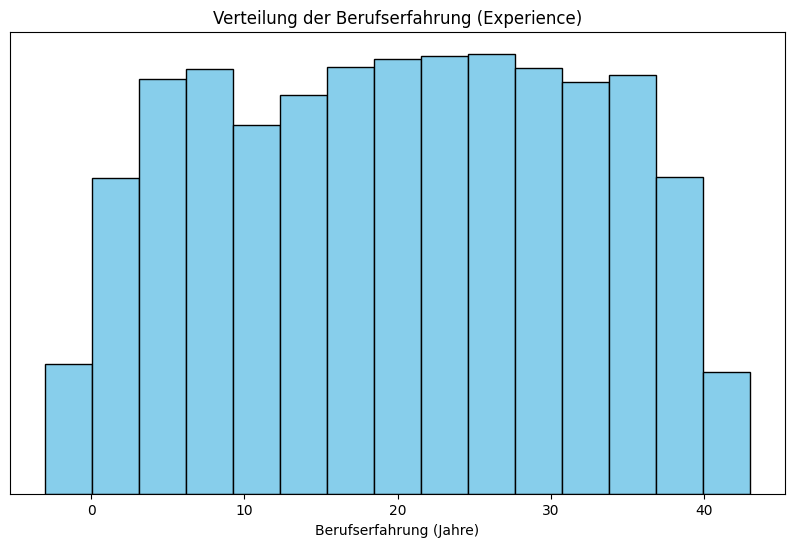

In [12]:
# Histogrammplot für die gesamte Berufserfahrung
plt.figure(figsize=(10, 6))
plt.hist(df['Experience'], bins=15, color='skyblue', edgecolor='black')
plt.title('Verteilung der Berufserfahrung (Experience)')
plt.xlabel('Berufserfahrung (Jahre)')

plt.yticks([])  
plt.ylabel('') 
plt.show()

Die Verteilung der Berufserfahrung sieht insgesamt gut aus. Irritierend sind nur die negativen Werte, da es keine negative Anzahl an Berufserfahrung gibt. Entweder es handelt sich um Tippfehler oder Falschangaben.

In [13]:
# Überprüfen der negativen Werte in "Experience"
negative_experience_count = df[df['Experience'] < 0].shape[0]
print("Anzahl der negativen Werte in Experience:", negative_experience_count)

Anzahl der negativen Werte in Experience: 52


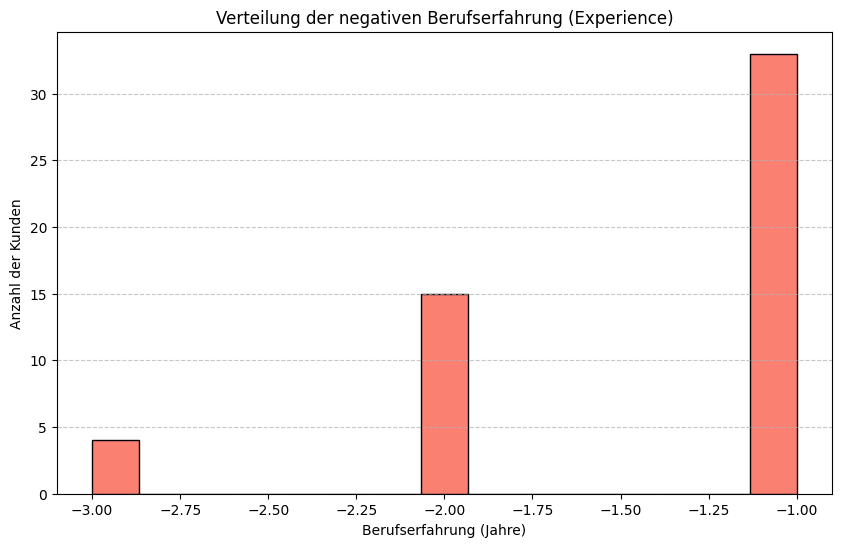

In [14]:
# Negative Werte in "Experience"
negative_experience = df[df['Experience'] < 0]

# Histogrammplot 
plt.figure(figsize=(10, 6))
plt.hist(negative_experience['Experience'], bins=15, color='salmon', edgecolor='black')
plt.title('Verteilung der negativen Berufserfahrung (Experience)')
plt.xlabel('Berufserfahrung (Jahre)')
plt.ylabel('Anzahl der Kunden')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontale Gridlinien
plt.show()

Das Minuszeichen liegt auf herkömmlichen Tastaturen, einschließlich des Numpads, weit entfernt von den Tasten für die Ziffern 1, 2 und 3, die in dem Datensatz fälschlicherweise als negative Werte auftauchen. Diese räumliche Trennung macht es unwahrscheinlich, dass es sich um einfache Tippfehler handelt. Obwohl 52 Datenpunkte zunächst nach einer signifikanten Anzahl erscheinen mögen, machen sie im Verhältnis zur Gesamtzahl des Datensatzes mit 5.000 Einträgen nur einen geringen Anteil aus. Daher erscheint das Entfernen dieser Einträge als vertretbare Maßnahme, um die Qualität und Genauigkeit der Klassifizierungsanalyse zu sichern. Als Data Scientist bevorzuge ich die Eliminierung dieser fehlerhaften Daten, um mögliche Verzerrungen in den Analyseergebnissen zu vermeiden.

In [15]:
# Filterung, um nur Einträge mit positiver oder null Erfahrung zu behalten
df = df[df['Experience'] >= 0]

# Überprüfung der Größe des neuen DataFrames
print("Anzahl der verbleibenden Zeilen im DataFrame:", df.shape[0])

Anzahl der verbleibenden Zeilen im DataFrame: 4948


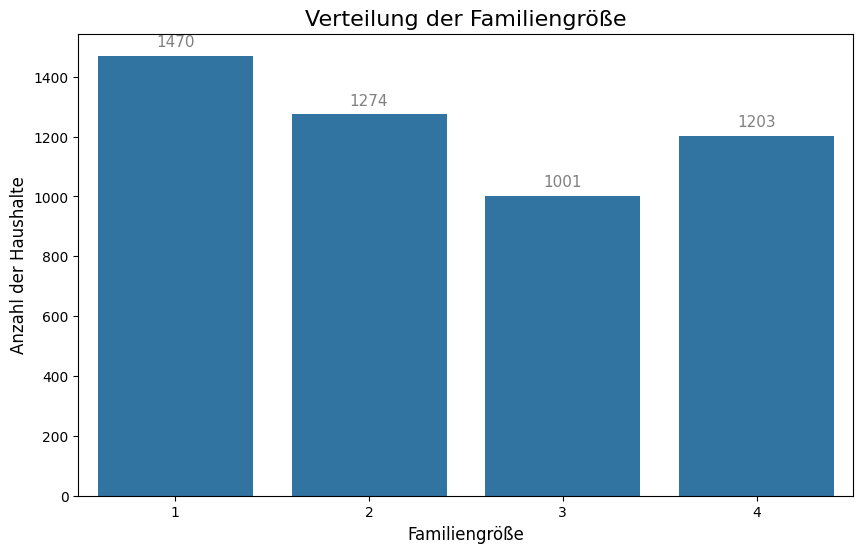

In [16]:
# Barplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Family', data=df)

# Titel und Beschriftungen
ax.set_title('Verteilung der Familiengröße', fontsize=16)
ax.set_xlabel('Familiengröße', fontsize=12)
ax.set_ylabel('Anzahl der Haushalte', fontsize=12)

# Werte über Plots
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
                textcoords='offset points')

plt.show()

Die verschiedenen Kategorien sind gleichmäßig verteilt. Die gleichmäßige Verteilung der Familiengröße kann eine ausgewogene Modellbildung gewährleisten, ohne dass eine Kategorie bevorzugt oder vernachlässigt wird, was die Vorhersagegenauigkeit verbessern kann.

###### Quelle: https://stackoverflow.com/questions/33179122/countplot-with-frequencies

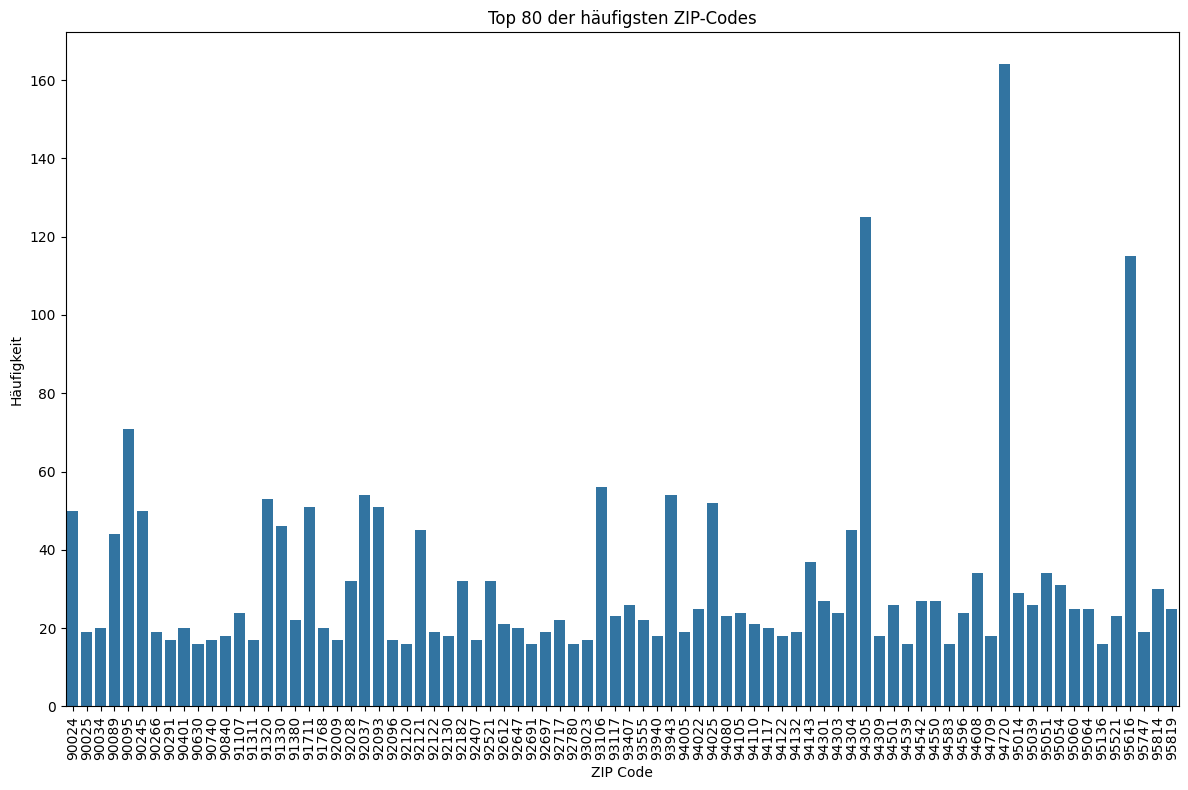

In [17]:
# Top 80 der häufigsten ZIP-Codes
zip_code_counts = df['ZIP Code'].value_counts().head(80)
zip_code_counts_sorted = zip_code_counts.sort_values()

# Barplot 
plt.figure(figsize=(12, 8))  
sns.barplot(x=zip_code_counts_sorted.index, y=zip_code_counts_sorted.values) 

plt.title('Top 80 der häufigsten ZIP-Codes')  
plt.xlabel('ZIP Code') 
plt.ylabel('Häufigkeit')  
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

Die Vielfalt und ungleiche Verteilung der ZIP-Codes im Datensatz führen zu hoher Kardinalität und potenziellem Overfitting ohne signifikante prädiktive Vorteile. Die hohe Anzahl an Kategorien könnte nach One-Hot-Encoding die Dimensionalität stark erhöhen, was die Modellkomplexität unnötig steigert und die Performance verschlechtern kann. Eine Aggregation zu größeren geografischen Einheiten oder die Verwendung anderer soziodemografischer Variablen könnte effektiver sein, um relevante Muster zu erfassen und die Modellgenauigkeit zu verbessern.

ZIP Code kategorien Prüfen:

In [18]:
number_of_unique_zip_codes = df['ZIP Code'].nunique()
print("Anzahl an Unique ZIP Codes:", number_of_unique_zip_codes)

Anzahl an Unique ZIP Codes: 467


In [19]:
df['ZIP Code'] = pd.to_numeric(df['ZIP Code'], errors='coerce')

# Daten, die außerhalb des Bereichs für Kalifornien liegen
out_of_ca = df[(df['ZIP Code'] < 90001) | (df['ZIP Code'] > 96199)]

print(f"Anzahl der ZIP-Codes außerhalb des Kalifornien-Bereichs: {out_of_ca.shape[0]}")

Anzahl der ZIP-Codes außerhalb des Kalifornien-Bereichs: 7


Der Datensatz enthält 467 einzigartige ZIP-Codes, was eine hohe Kardinalität darstellt. Bei Anwendung von One-Hot-Encoding auf so viele Kategorien würde dies zu einer erheblichen Zunahme der Dimensionalität führen. Eine derart hohe Dimensionalität kann die Komplexität des Modells unnötig steigern und das Training erschweren. Zudem liegen fast alle Datenpunkte (bis auf 7 Ausnahmen) innerhalb des Kalifornischen ZIP-Code-Bereichs, was die potenzielle Nützlichkeit einer Aggregation auf Bundeslandebene minimiert. Eine Überprüfung gegen einen externen Datensatz hat zudem gezeigt, dass auch eine Aggregation auf Stadtebene zu einer hohen Anzahl an Kategorien führen würde, mit hunderten von unterschiedlichen Städte. Angesichts dieser Umstände erscheint es sinnvoll, das ZIP-Code-Feature zu entfernen, um die Modellleistung und -effizienz zu verbessern.

###### Quelle ZIP Codes: https://www.quora.com/How-many-zip-codes-are-in-California

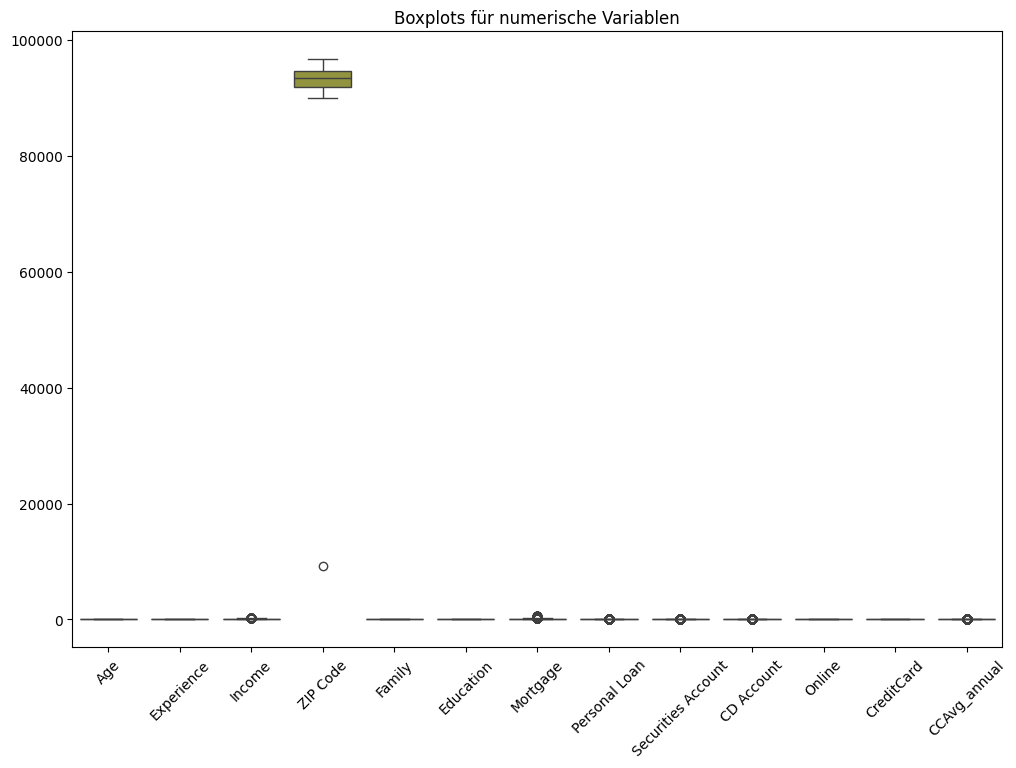

In [20]:
#Boxplot Visualisation aller Attribute, um Ausreißer zu finden
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['float', 'int']))
plt.xticks(rotation=45)
plt.title('Boxplots für numerische Variablen')
plt.show()

ZIP-Code scheint einen Extremausreißer zu haben, das sollten wir uns näher ansehen. 

In [21]:
# Einträge mit einem ZIP-Code unter 20000
outliers_zip_code = df[df['ZIP Code'] < 20000]
outliers_zip_code

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_annual
384,51,25,21,9307,4,3,0,0,0,0,1,1,7.2


Dieser ZIP-Code hat lediglich 4 Stellen, die restlichen ZIP-Codes haben 5 stellen, was auch an den min-max Werten in der IDA zu erkennen war. Es scheint sich um einen Tippfehler zu handeln. Dadurch dass das ZIP Codes Feature in den nächsten Schritten entfernt wird, werde ich hier nichts weiter unternehmen.

Rest-Features untersuchen, die auch potenziell Ausreißer haben könnten:

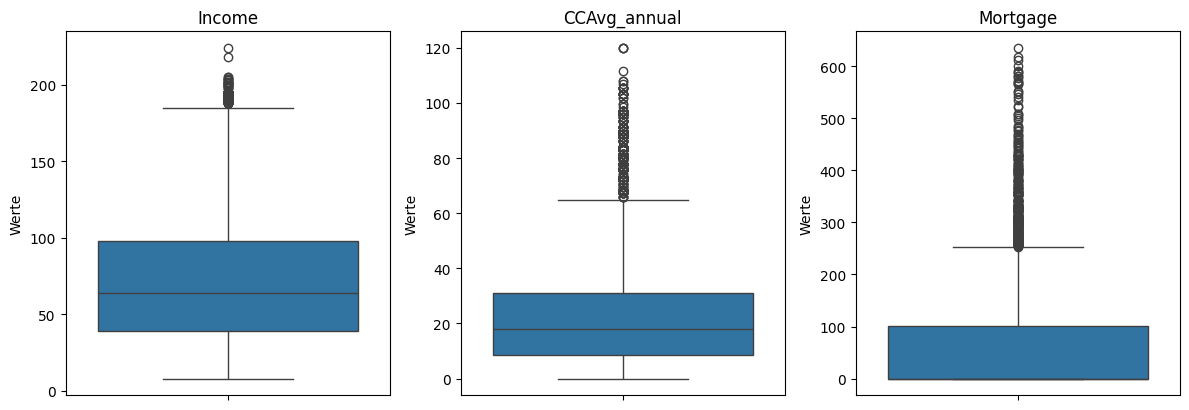

In [22]:
# Liste der zu untersuchenden Features
features = ['Income', 'CCAvg_annual', 'Mortgage']

# Boxplots für jedes Feature
plt.figure(figsize=(12, 8)) 
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)  
    plt.ylabel('Werte') 

plt.tight_layout()  
plt.show()

Alle drei Features haben Ausreißer, hier ist es spannend die Ausreißer näher zu untersuchen.

In [23]:
#Deskriptive Statistiken näher ansehen:
print(df[['Income', 'CCAvg_annual', 'Mortgage']].describe())

            Income  CCAvg_annual     Mortgage
count  4948.000000   4948.000000  4948.000000
mean     73.814470     23.230800    56.634398
std      46.112596     20.972397   101.828885
min       8.000000      0.000000     0.000000
25%      39.000000      8.400000     0.000000
50%      64.000000     18.000000     0.000000
75%      98.000000     31.200000   101.000000
max     224.000000    120.000000   635.000000


* **Income:** Mit einem Bereich von 8 bis 224 und einem deutlichen Sprung über dem 75%-Quantil zeigt Income potenzielle Ausreißer, besonders bei einem Maximalwert von 224, der weit über dem Durchschnitt von 73,81 liegt.
* **CCAvg_annual:** Mit einem Bereich von 0 bis 120 und einem deutlichen Sprung über dem 75%-Quantil zeigt CCAvg_annual potenzielle Ausreißer, besonders bei einem Maximalwert von 120, der weit über dem Durchschnitt von 23,23 liegt.
* **Mortgage:** Ähnlich wie bei Income, zeigt Mortgage mit einem Maximum von 635 und 25% der Daten bei 0 einen starken Kontrast in der Verteilung, was auch auf Ausreißer hindeutet.

Identifizierung genauer Ausreißergrenzen durch Interquartilabstand (IQR):

###### https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/ & https://sustainabilitymethods.org/index.php/Outlier_Detection_in_Python

In [24]:
# Berechnung der Ausreißergrenzen
Q1_income = df['Income'].quantile(0.25)
Q3_income = df['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
upper_bound_income = Q3_income + 1.5 * IQR_income

Q1_CCAvg = df['CCAvg_annual'].quantile(0.25)
Q3_CCAvg = df['CCAvg_annual'].quantile(0.75)
IQR_CCAvg = Q3_CCAvg - Q1_CCAvg
upper_bound_CCAvg = Q3_CCAvg + 1.5 * IQR_CCAvg

Q1_Mortgage = df['Mortgage'].quantile(0.25)
Q3_Mortgage = df['Mortgage'].quantile(0.75)
IQR_Mortgage = Q3_Mortgage - Q1_Mortgage
upper_bound_Mortgage = Q3_Mortgage + 1.5 * IQR_Mortgage

print("Upper Bound for Income:", upper_bound_income)
print("Upper Bound for CCAvg_annual:", upper_bound_CCAvg)
print("Upper Bound for Mortgage:", upper_bound_Mortgage)

Upper Bound for Income: 186.5
Upper Bound for CCAvg_annual: 65.4
Upper Bound for Mortgage: 252.5


Werte über diesen Schwellen können als Ausreißer betrachtet werden. Ich plane die Ausreißerbehandlung mittels Kappen.
Durch das Kappen dieser Features möchte ich die Auswirkung von Extremwerten begrenzen, um ein Modell zu schaffen, das besser generalisiert und weniger anfällig für Überanpassung ist.

In [25]:
# Kappen der Features auf die oberen Grenzen
df['Income_Capped'] = df['Income'].clip(upper=upper_bound_income)
df['CCAvg_annual_Capped'] = df['CCAvg_annual'].clip(upper=upper_bound_CCAvg)
df['Mortgage_Capped'] = df['Mortgage'].clip(upper=upper_bound_Mortgage)

# Überprüfung der neuen Statistiken, um den Effekt des Kappens zu sehen
print(df[['Income_Capped', 'CCAvg_annual_Capped', 'Mortgage_Capped']].describe())

       Income_Capped  CCAvg_annual_Capped  Mortgage_Capped
count    4948.000000          4948.000000      4948.000000
mean       73.656023            22.149798        50.590946
std        45.701532            17.898181        83.001051
min         8.000000             0.000000         0.000000
25%        39.000000             8.400000         0.000000
50%        64.000000            18.000000         0.000000
75%        98.000000            31.200000       101.000000
max       186.500000            65.400000       252.500000


In [26]:
# Entfernen der ursprünglichen, nicht gekappten Features
df.drop(['Income', 'CCAvg_annual', 'Mortgage'], axis=1, inplace=True)

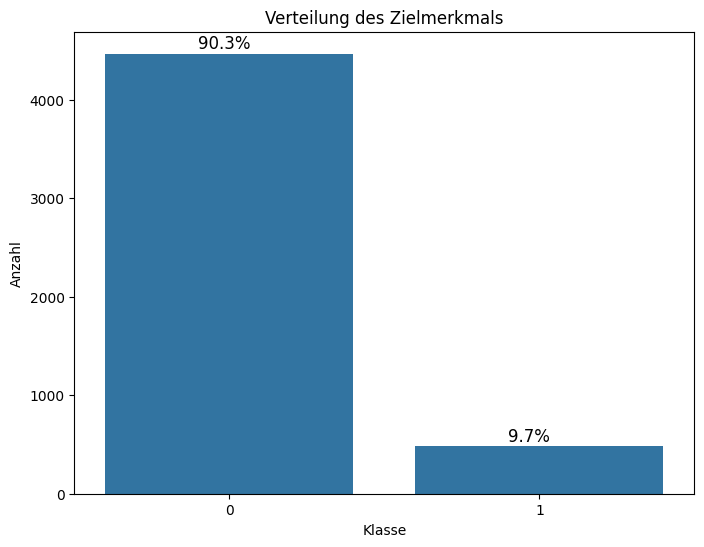

In [27]:
# Balkendiagramm der Zielvariable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Personal Loan'])
plt.title('Verteilung des Zielmerkmals')
plt.xlabel('Klasse')
plt.ylabel('Anzahl')

# Gesamtzahl der Beobachtungen
total = len(df['Personal Loan'])

# Prozentzahlen über den Balken 
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 0.01 * total
    ax.annotate(percentage, (x, y), size = 12)

plt.show()

Bei der Untersuchung der Zielvariable fällt auf, dass sie stark ungleich verteilt ist. Es gibt verschiedene Techniken, um mit diesem Ungleichgewicht in den Daten umzugehen:

* **Upsampling:** Hierbei werden Kopien der unterrepräsentierten Klasse hinzugefügt, um ein Gleichgewicht herzustellen. Obwohl diese Methode effektiv das Gleichgewicht wiederherstellen kann, besteht das Risiko des Overfitting. Dies geschieht, weil das Modell dazu neigen könnte, sich zu stark auf wiederholte, identische Beispiele zu verlassen, was seine Fähigkeit, auf neuen, unbekannten Daten zu generalisieren, beeinträchtigen kann.

* **Downsampling:** Bei dieser Technik werden zufällig Datenpunkte aus der überrepräsentierten Klasse entfernt. Dies führt zu einer gleichmäßigeren Verteilung der Klassen, jedoch geht wichtige Information verloren, da potenziell nützliche Daten aus dem Trainingsprozess ausgeschlossen werden.

* **Verwendung robuster Algorithmen:** : Einige Machine-Learning-Algorithmen sind besser geeignet, mit Datenungleichgewichten umzugehen. Diese robusten Algorithmen, wie Entscheidungsbäume, Random Forests und bestimmte Arten von Boosting-Algorithmen, beinhalten intern Mechanismen, die es ihnen ermöglichen, auch bei unausgeglichenen Klassendaten effizient zu lernen.

##### Pearson-Korrelation:

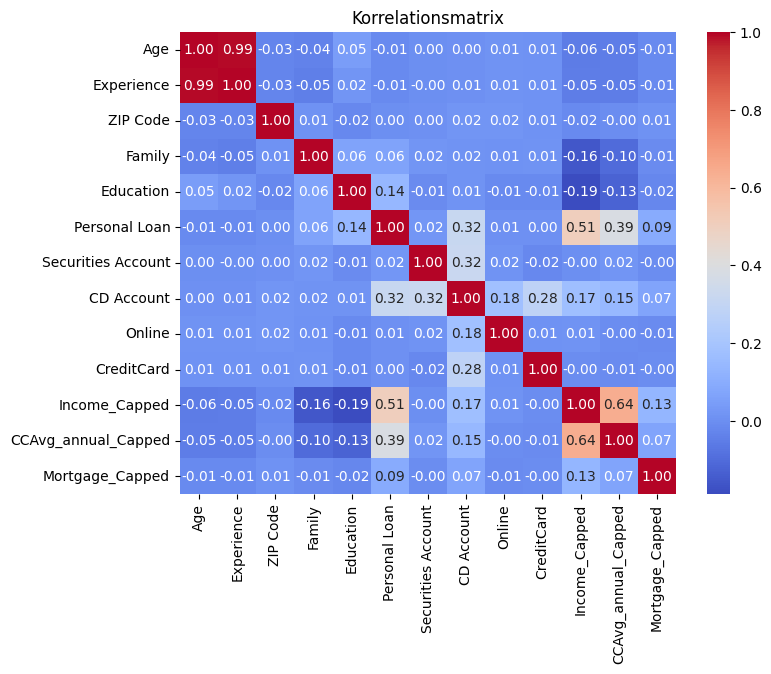

In [28]:
# Visualisieren der Korrelationsmatrix als Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Korrelationsmatrix')
plt.show()

##### Interpretation der Korrelationsergebnisse:

* **Alter und Berufserfahrung:** Die Korrelation zwischen 'Age' (Alter) und 'Experience' (Berufserfahrung) beträgt beeindruckende 0.99. Dies deutet auf einen starken linearen Zusammenhang hin, da typischerweise mit zunehmendem Alter auch die Berufserfahrung steigt. Dieser Befund ist intuitiv, da die meisten Menschen über die Jahre kontinuierlich in ihrem Berufsfeld arbeiten.

* **Einkommen und Ausgabenverhalten:** Das Einkommen ('Income') korreliert mit 0.64 signifikant mit den jährlichen Kreditkartenausgaben ('CCAvg_annual_Capped'). Dies unterstützt die Annahme, dass Personen mit höherem Einkommen tendenziell mehr Geld ausgeben. 

* **Einkommen und Bildung:** Interessanterweise besteht eine schwach negative Korrelation von -0.19 zwischen 'Income' und 'Education', was darauf hindeuten könnte, dass höheres Einkommen nicht zwangsläufig mit einer höheren Bildung einhergeht. Dies ist eine interessant Beobachtung, da sie gängigen Annahmen widerspricht.

* **Einkommen und Familienstruktur:** Es besteht eine leichte negative Korrelation zwischen 'Income' und 'Family', was darauf hinweisen könnte, dass höheres Einkommen tendenziell mit kleineren Familien korreliert.

* **Korrelationen mit dem Zielattribut 'Personal Loan':** Das Zielattribut 'Personal Loan' zeigt erkennbare positive Korrelationen mit 'Income' (0.51), 'CCAvg_annual_Capped' (0.39) und 'CD Account' (0.32). Dies lässt vermuten, dass Personen mit höherem Einkommen und höheren Ausgaben eher geneigt sind, persönliche Darlehen aufzunehmen. Geringere, aber dennoch positive Korrelationen mit 'Education' und 'Mortgage' unterstützen die Idee, dass bestimmte finanzielle und bildungsbezogene Hintergründe Einfluss auf die Aufnahme von persönlichen Darlehen haben könnten.

* **ZIP Code:** Es zeigt sich keine signifikante Korrelation zwischen 'ZIP Code' und anderen Merkmalen, was erneut darauf hinweist, dass die Postleitzahl allein wenig Aussagekraft für das Klassifizierungsmodell besitzt und aus dem Modell entfernt werden sollte, um die Modellkomplexität zu reduzieren.

Entfernung von ZIP Code Feature:

In [29]:
df.drop(['ZIP Code'], axis=1, inplace=True)

<h5 style="color: orange; font-weight: bold;">First Impression</h5>

Initiales Preprocessing:

In [30]:
# Features und Zielvariable definieren
X = df.drop(['Personal Loan'], axis=1)  
y = df['Personal Loan']

# Kategoriale und numerische Features definieren
categorical_features = ['Education', 'Family']
numeric_features = X.columns.difference(categorical_features)

In [31]:
# Korrekte Trennung Prüfen:
print("Kategoriale Features:", categorical_features)
print("Numerische Features:", numeric_features)
print("-----------------------------------------------------------------------------------------------------------")
print("Erste Zeile von y:")
print(X.head(1))
print("-----------------------------------------------------------------------------------------------------------")
print("Erste Zeile von X:")
print(y.head(1))

Kategoriale Features: ['Education', 'Family']
Numerische Features: Index(['Age', 'CCAvg_annual_Capped', 'CD Account', 'CreditCard', 'Experience',
       'Income_Capped', 'Mortgage_Capped', 'Online', 'Securities Account'],
      dtype='object')
-----------------------------------------------------------------------------------------------------------
Erste Zeile von y:
   Age  Experience  Family  Education  Securities Account  CD Account  Online  \
0   25           1       4          1                   1           0       0   

   CreditCard  Income_Capped  CCAvg_annual_Capped  Mortgage_Capped  
0           0           49.0                 19.2              0.0  
-----------------------------------------------------------------------------------------------------------
Erste Zeile von X:
0    0
Name: Personal Loan, dtype: int64


In [32]:
# Vorverarbeitung konfigurieren
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

###### Pipeline Quellen: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html &  https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer

Aufteilen in Trainings und Testsplits:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Um eine repräsentative Verteilung der Klassen in beiden Trainings- und Testsets zu gewährleisten, verwende ich eine stratifizierte Aufteilung. Dies ist besonders wichtig bei dem unausgewogenen Datensatz, da es hilft, Verzerrungen in der Modellbewertung und -training zu vermeiden und die Genauigkeit der Vorhersagen zu verbessern.

Festlegen einer Baseline und Bewertung

In [34]:
# Baseline-Modell
dummy_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])

dummy_pipeline.fit(X_train, y_train)
baseline_predictions = dummy_pipeline.predict(X_test)
baseline_f1 = f1_score(y_test, baseline_predictions, average='macro')
print("Baseline F1-Score:", baseline_f1)

Baseline F1-Score: 0.4745222929936306


Das Baseline-Ergebnis von 0.4745 zeigt, dass der Dummy Classifier, der immer die häufigste Klasse vorhersagt, nur eine moderate Leistung erbringt. Dies stellt eine niedrige Messlatte dar, die die komplexeren Modelle übertreffen sollten, um als nützlich erachtet zu werden.

###### DummyClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

Auswahl und Testen von zwei ML-Algorithmen

In [35]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)

# SVM Pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)

# Bewertungen
rf_f1 = f1_score(y_test, rf_predictions, average='macro')
svm_f1 = f1_score(y_test, svm_predictions, average='macro')

print("F1-Score Random Forest:", rf_f1)
print("F1-Score SVM:", svm_f1)

F1-Score Random Forest: 0.9557101144975559
F1-Score SVM: 0.9382708351519535


**Auswahl der Algorithmen und Gütemaße**

**Algorithmen:**
* Random Forest (RF): Gewählt für seine Robustheit und Fähigkeit, Overfitting zu vermeiden, was in einem Datensatz mit begrenzten Features und potentiellem Klassenungleichgewicht entscheidend ist.

* Support Vector Machine (SVM): Ausgewählt wegen seiner Effektivität bei der klaren Trennung zwischen den Klassen, was bei einem Ziel wie der Kreditvergabe wichtig ist, wo präzise Entscheidungen gefordert sind.

**Gütemaß - F1-Metrik:**
Der F1-Score ist ein kritischer Indikator für die Leistung bei unausgewogenen Datensätzen wie in diesem Fall, wo das Target 'Personal Loan' ungleich verteilt ist. Er berücksichtigt sowohl die Precision (Anteil der korrekten positiven Vorhersagen an allen positiven Vorhersagen) als auch den Recall (Anteil der korrekten positiven Vorhersagen an allen tatsächlichen Positiven), was ihn zu einem robusten Gütemaß macht, um die Leistung eines Modells über beide Klassen hinweg fair zu beurteilen. Dies ist entscheidend, da ein Modell, das hauptsächlich die Mehrheitsklasse korrekt vorhersagt, durch Genauigkeit (Accuracy) überbewertet werden könnte.

**Ergebnisbewertung:**
* RF Ergebnisse: Der F1-Score von 0.9557 deutet auf eine ausgezeichnete Modellleistung hin.
* SVM Ergebnisse: Ein F1-Score von 0.9383 zeigt ebenfalls eine starke Leistung, jedoch leicht unterhalb der des Random Forest.

Confusion Matrix:

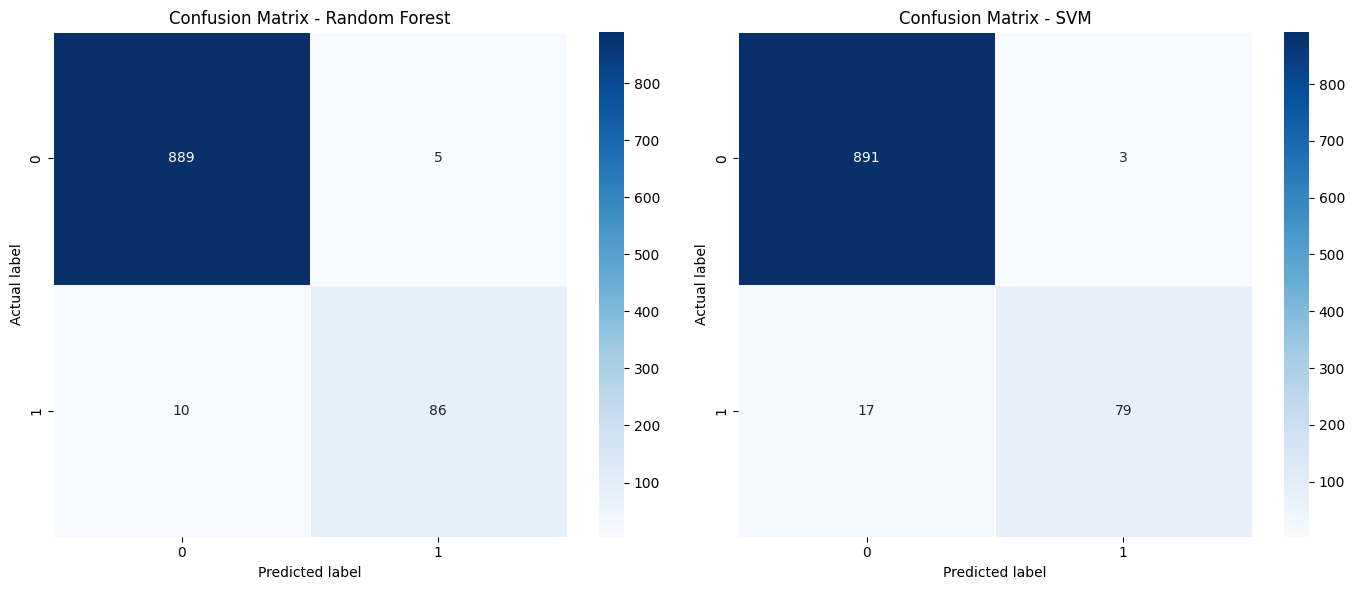

In [36]:
cm_rf = confusion_matrix(y_test, rf_predictions)
cm_svm = confusion_matrix(y_test, svm_predictions)

# Subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# RF
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=.5, cmap="Blues", ax=ax[0])
ax[0].set_title('Confusion Matrix - Random Forest')
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

# SVM
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap="Blues", ax=ax[1])
ax[1].set_title('Confusion Matrix - SVM')
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')

plt.tight_layout()
plt.show()

**Interpretation der Confusion Matrix und Modellleistung:**

* **Random Forest:**
  * **True Negatives (TN)**: 889 - Die meisten Nicht-Kreditnehmer wurden korrekt identifiziert.
  * **False Positives (FP)**: 5 - Nur wenige Nicht-Kreditnehmer wurden fälschlicherweise als Kreditnehmer klassifiziert.
  * **False Negatives (FN)**: 10 - Eine kleine Anzahl von tatsächlichen Kreditnehmern wurde übersehen.
  * **True Positives (TP)**: 86 - Eine starke Leistung bei der korrekten Identifizierung von Kreditnehmern.

* **Support Vector Machine (SVM):**
  * **True Negatives (TN)**: 891 - Ähnlich wie RF, mit einer sehr hohen Anzahl korrekt klassifizierter Nicht-Kreditnehmer.
  * **False Positives (FP)**: 3 - Noch weniger Fehlklassifikationen bei Nicht-Kreditnehmern im Vergleich zu RF.
  * **False Negatives (FN)**: 17 - Mehr tatsächliche Kreditnehmer wurden übersehen als bei RF.
  * **True Positives (TP)**: 79 - Weniger Kreditnehmer korrekt erkannt im Vergleich zu RF.

**Schlussfolgerung:**
* **Random Forest** zeigt eine bessere Gesamtleistung mit weniger Fehlklassifikationen und einer höheren Anzahl an korrekt erkannten Kreditnehmern (True Positives). Die geringere Zahl an False Negatives weist auf eine effektivere Erkennung von Kreditnehmern hin.
* **SVM** liefert ebenfalls eine präzise Klassifizierung, besonders im Hinblick auf die geringere Zahl an False Positives, zeigt jedoch eine konservativere Tendenz mit mehr False Negatives.
* Die hohe Genauigkeit beider Modelle könnte auf Overfitting hindeuten, was durch weitere Kreuzvalidierung und Hyperparameter-Optimierung überprüft wird in den weiteren Schritten. 


<h5 style="color: orange; font-weight: bold;">Nested Cross Validation</h5>

**Pipeline:**

In [37]:
# ColumnTransformer für SVM
svm_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

# ColumnTransformer für Random Forest
rf_transformer = ColumnTransformer([
    ('ordinal', OrdinalEncoder(), categorical_features),
    ('num', 'passthrough', numeric_features)
])

# Downsampling für das Training
downsampling = RandomUnderSampler(random_state=42)

# Hyperparameter-Raster für SVM und Random Forest
svm_param_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'model__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'model__degree': [2, 3, 4]  # Nur relevant für 'poly'
}

rf_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Pipeline für SVM
svm_pipeline = ImbPipeline([
    ('transform', svm_transformer),
    ('downsample', downsampling),
    ('model', SVC(probability=True))
])

# Pipeline für Random Forest
rf_pipeline = ImbPipeline([
    ('transform', rf_transformer),
    ('downsample', downsampling),
    ('model', RandomForestClassifier(random_state=42))
])

# GridSearchCV für Nested Cross Validation
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dummy Classifier für die Baseline
baseline_model = DummyClassifier(strategy='most_frequent')

# Nested Cross Validation für die Baseline
baseline_scores = cross_val_score(baseline_model, X, y, cv=outer_cv, scoring='f1_macro', n_jobs=-1)

# GridSearch für SVM und RF
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=inner_cv, scoring='f1_macro', n_jobs=-1)
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=inner_cv, scoring='f1_macro', n_jobs=-1)

# Nested Cross Validation für SVM und RF
svm_scores = cross_val_score(svm_grid_search, X, y, cv=outer_cv, scoring='f1_macro', n_jobs=-1)
rf_scores = cross_val_score(rf_grid_search, X, y, cv=outer_cv, scoring='f1_macro', n_jobs=-1)

# Ergebnisse
print(f"Baseline F1-Score: {baseline_scores.mean():.4f} ± {baseline_scores.std():.4f}")
print(f"SVM F1-Score: {svm_scores.mean():.4f} ± {svm_scores.std():.4f}")
print(f"Random Forest F1-Score: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")

# Vergleich der Performance-Metriken
metrics = ['precision_macro', 'recall_macro', 'f1_macro']
for metric in metrics:
    # GridSearch für SVM und Random Forest
    svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=inner_cv, scoring=metric, n_jobs=-1)
    rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=inner_cv, scoring=metric, n_jobs=-1)

    baseline_scores = cross_val_score(baseline_model, X, y, cv=outer_cv, scoring=metric, n_jobs=-1)
    svm_scores = cross_val_score(svm_grid_search, X, y, cv=outer_cv, scoring=metric, n_jobs=-1)
    rf_scores = cross_val_score(rf_grid_search, X, y, cv=outer_cv, scoring=metric, n_jobs=-1)

    print(f"{metric.capitalize()} - Baseline: {baseline_scores.mean():.4f} ± {baseline_scores.std():.4f}")
    print(f"{metric.capitalize()} - SVM: {svm_scores.mean():.4f} ± {svm_scores.std():.4f}")
    print(f"{metric.capitalize()} - Random Forest: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")

# Beste Modelle speichern
svm_grid_search.fit(X, y) 
best_svm_model = svm_grid_search.best_estimator_
rf_grid_search.fit(X, y)  
best_rf_model = rf_grid_search.best_estimator_

joblib.dump(best_rf_model, 'best_rf_model.joblib')
joblib.dump(best_svm_model, 'best_svm_model.joblib')

Baseline F1-Score: 0.4745 ± 0.0000
SVM F1-Score: 0.8922 ± 0.0201
Random Forest F1-Score: 0.9133 ± 0.0196
Precision_macro - Baseline: 0.4515 ± 0.0000
Precision_macro - SVM: 0.8864 ± 0.0628
Precision_macro - Random Forest: 0.8744 ± 0.0292
Recall_macro - Baseline: 0.5000 ± 0.0000
Recall_macro - SVM: 0.9500 ± 0.0153
Recall_macro - Random Forest: 0.9686 ± 0.0082
F1_macro - Baseline: 0.4745 ± 0.0000
F1_macro - SVM: 0.8922 ± 0.0201
F1_macro - Random Forest: 0.9133 ± 0.0196


['best_svm_model.joblib']

## Vergleich der Modelle

| Metrik                       | Baseline            | SVM                    | Random Forest         |
|------------------------------|---------------------|------------------------|-----------------------|
| F1-Score                     | 0.4745 ± 0.0000     | 0.8922 ± 0.0201        | 0.9133 ± 0.0196      |
| Precision_macro              | 0.4515 ± 0.0000     | 0.8864 ± 0.0628        | 0.8744 ± 0.0292      |
| Recall_macro                 | 0.5000 ± 0.0000     | 0.9500 ± 0.0153        | 0.9686 ± 0.0082       |
| F1_macro                     | 0.4745 ± 0.0000     | 0.8922 ± 0.0201        | 0.9133 ± 0.0196       |

**Interpretation:**

* **Baseline-Metriken** zeigen eine Standardabweichung von 0.0000, was auf eine konstante Leistung in allen Folds der Cross-Validation hinweist. Dies ist typisch für die `most_frequent` Strategie, welche konstant dieselbe Klasse vorhersagt.
* **SVM und Random Forest** übertreffen die Baseline deutlich in allen Metriken. Die vorhandenen Standardabweichungen sind ein Indikator dafür, dass die Modelle in unterschiedlichen Folds leichte Variationen in ihrer Leistung zeigen, was auf eine robuste Modellleistung in verschiedenen Datenunterteilungen hinweist.

**Interpretation der Modellleistung:**

* **Random Forest** erreicht durchgehend die höchsten Scores und zeigt besonders bei `Recall_macro` herausragende Werte, was auf eine exzellente Fähigkeit hinweist, die meisten positiven Fälle korrekt zu identifizieren. Die hohe Leistung über alle Metriken hinweg deutet auf eine gute Anpassung an die Daten und eine effektive Handhabung der Feature-Interaktionen hin.
* **SVM** zeigt ebenfalls starke Leistungen, vor allem im Recall, was auf eine gute Erkennung der positiven Klasse hinweist. Trotz leicht niedrigerer Precision im Vergleich zu Random Forest ist SVM effektiv in der Klassifizierung.
* **Baseline** liefert erwartungsgemäß die niedrigsten Werte, was bestätigt, dass sowohl SVM als auch Random Forest signifikant effektiver sind als ein einfacher Ansatz.

**Schlussfolgerung:**

* Diese Ergebnisse bestätigen, dass sowohl SVM als auch Random Forest deutlich leistungsfähiger sind als eine einfache Baseline. Aufgrund der überlegenen Metriken, insbesondere beim Recall, ist Random Forest jedoch der bevorzugte Algorithmus.

#### Vergleich der Trainings- und Testleistung

In [38]:
# Funktion zur Bewertung der Modelle mit Trainings- und Testleistungen
def evaluate_model(model, X, y, cv, scoring):
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True, n_jobs=-1)
    for metric in scoring.keys():
        train_mean = scores['train_' + metric].mean()
        train_std = scores['train_' + metric].std()
        test_mean = scores['test_' + metric].mean()
        test_std = scores['test_' + metric].std()
        print(f"{metric.capitalize()} - Train: {train_mean:.4f} ± {train_std:.4f}, Test: {test_mean:.4f} ± {test_std:.4f}")

# Bewertung der Modelle
scoring = {'precision_macro': make_scorer(precision_score, average='macro'),
           'recall_macro': make_scorer(recall_score, average='macro'),
           'f1_macro': make_scorer(f1_score, average='macro')}

print("SVM Performance:")
evaluate_model(svm_grid_search.best_estimator_, X, y, outer_cv, scoring)

print("Random Forest Performance:")
evaluate_model(rf_grid_search.best_estimator_, X, y, outer_cv, scoring)

print("Baseline Performance:")
evaluate_model(baseline_model, X, y, outer_cv, scoring)

SVM Performance:
Precision_macro - Train: 0.8646 ± 0.0082, Test: 0.8579 ± 0.0244
Recall_macro - Train: 0.9606 ± 0.0033, Test: 0.9500 ± 0.0158
F1_macro - Train: 0.9049 ± 0.0061, Test: 0.8959 ± 0.0177
Random Forest Performance:
Precision_macro - Train: 0.8881 ± 0.0132, Test: 0.8759 ± 0.0341
Recall_macro - Train: 0.9844 ± 0.0024, Test: 0.9688 ± 0.0074
F1_macro - Train: 0.9290 ± 0.0098, Test: 0.9140 ± 0.0228
Baseline Performance:
Precision_macro - Train: 0.4515 ± 0.0000, Test: 0.4515 ± 0.0000
Recall_macro - Train: 0.5000 ± 0.0000, Test: 0.5000 ± 0.0000
F1_macro - Train: 0.4745 ± 0.0000, Test: 0.4745 ± 0.0000


### Interpretation der Ergebnisse


| Modell         | Metrik           | Trainingswert       | Testwert           |
|----------------|------------------|---------------------|--------------------|
| **SVM**        | Precision_macro  | 0.8646 ± 0.0082     | 0.8579 ± 0.0244    |
|                | Recall_macro     | 0.9606 ± 0.0033     | 0.9500 ± 0.0158    |
|                | F1_macro         | 0.9049 ± 0.0061     | 0.8959 ± 0.0177    |
| **Random Forest** | Precision_macro  | 0.8881 ± 0.0132     | 0.8759 ± 0.0341    |
|                | Recall_macro     | 0.9844 ± 0.0024     | 0.9688 ± 0.0074    |
|                | F1_macro         | 0.9290 ± 0.0098     | 0.9140 ± 0.0228    |
| **Baseline**   | Precision_macro  | 0.4515 ± 0.0000     | 0.4515 ± 0.0000    |
|                | Recall_macro     | 0.5000 ± 0.0000     | 0.5000 ± 0.0000    |
|                | F1_macro         | 0.4745 ± 0.0000     | 0.4745 ± 0.0000    |

**SVM Performance:**
* **Precision_macro:** Zeigt minimale Unterschiede zwischen Trainings- und Testergebnissen, was auf gute Generalisierungsfähigkeit hinweist.
* **Recall_macro:** Sehr hoher Recall sowohl im Training als auch im Test, effektiv in der Identifizierung der positiven Klasse.
* **F1_macro:** Stabiler F1-Score nahe an 0.90 zeigt eine ausgeglichene Leistung zwischen Präzision und Recall.

**Random Forest Performance:**
* **Precision_macro:** Leichte Überanpassung sichtbar, bleibt jedoch präzise in der Testphase.
* **Recall_macro:** Außergewöhnlich hoher Recall, zeigt hervorragende Fähigkeit zur korrekten Identifizierung positiver Fälle.
* **F1_macro:** Hoher F1-Score zeigt, dass Random Forest Präzision und Recall effektiv balanciert.

**Baseline Performance:**
* **Precision_macro, Recall_macro, F1_macro:** Erwartungsgemäß niedrige Werte, bestätigt die Unzulänglichkeit einer einfachen Baseline-Methode im Vergleich zu fortgeschrittenen Modellen.

### Schlussfolgerung und Modellauswahl

Basierend auf den Ergebnissen der Nested Cross-Validation und den Vergleichen der Trainings- und Testleistungen ist ersichtlich, dass **Random Forest** das stärkste Modell ist. Es übertrifft SVM in fast allen Metriken, insbesondere im Recall und F1-Score, was auf eine überlegene Fähigkeit zur Erkennung positiver Fälle und eine effektive Balance zwischen Präzision und Recall hinweist.

Obwohl SVM ebenfalls beeindruckende Ergebnisse liefert, vor allem im Hinblick auf die Stabilität seiner Leistung zwischen Training und Test, bietet Random Forest eine bessere Gesamtleistung, insbesondere bei der Generalisierungsfähigkeit, wie durch die niedrigen Standardabweichungen angezeigt wird. Daher wähle ich **Random Forest** als das finale Modell basierend auf seiner konsistenten und robusten Leistung über verschiedene Datensätze und Metriken hinweg.

<h5 style="color: orange; font-weight: bold;">Analysis of the Final Model</h5>

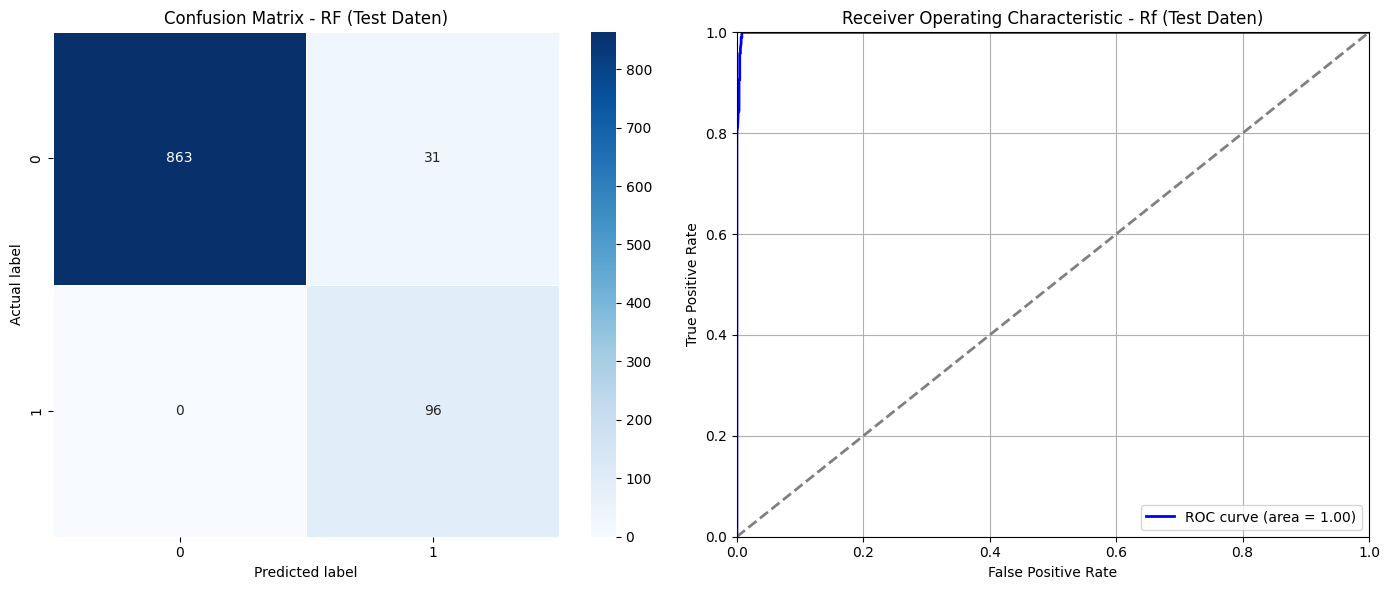

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       894
           1       0.76      1.00      0.86        96

    accuracy                           0.97       990
   macro avg       0.88      0.98      0.92       990
weighted avg       0.98      0.97      0.97       990



In [39]:
# Das beste Modell laden (RF)
best_rf_model = joblib.load('best_rf_model.joblib')

# Testdaten vorhersagen
rf_predictions = best_rf_model.predict(X_test)
rf_probabilities = best_rf_model.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeiten für die positive Klasse

# Confusion Matrix 
cm_rf = confusion_matrix(y_test, rf_predictions)

# ROC-Kurve und AUC 
fpr, tpr, _ = roc_curve(y_test, rf_probabilities)
roc_auc = auc(fpr, tpr)

# Subplots für Confusion Matrix und ROC-Kurve
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix plot
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=.5, cmap="Blues", ax=ax[0])
ax[0].set_title('Confusion Matrix - RF (Test Daten)')
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

# ROC Kurven Plot
ax[1].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.0])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic - Rf (Test Daten)')
ax[1].legend(loc="lower right")
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Klassifikationsreport
print("Classification Report - Random Forest")
print(classification_report(y_test, rf_predictions))

## Diskussion über die Modellleistung

### Analyse der Confusion Matrix, ROC-Kurve und des Klassifikationsberichts

#### Confusion Matrix
Die Confusion Matrix zeigt, dass das Random Forest-Modell sehr gut darin ist, die Klasse 0 (Personen, die keinen Kredit aufgenommen haben) korrekt zu identifizieren. Es gibt 31 False Positives, was bedeutet, dass einige Personen, die keinen Kredit aufgenommen haben, fälschlicherweise als Kreditnehmer klassifiziert wurden. Bemerkenswert ist auch, dass es keine False Negatives gibt, was bedeutet, dass alle Personen, die tatsächlich einen Kredit aufgenommen haben, korrekt identifiziert wurden.

#### ROC-Kurve
Die ROC-Kurve weist eine AUC von 1.00 auf, was auf eine hervorragende Fähigkeit des Modells hinweist, zwischen den beiden Klassen zu unterscheiden. Dies bedeutet, dass das Modell in der Lage ist, nahezu perfekt zu entscheiden, ob jemand einen Kredit aufgenommen hat oder nicht, basierend auf dem Schwellenwert.

#### Klassifikationsbericht
Der Klassifikationsbericht zeigt, dass das Modell eine hohe Präzision und einen hohen Recall für die Klasse 0 aufweist, was die dominante Klasse im Datensatz ist. Für die Klasse 1 ist der Recall perfekt (1.00), was bedeutet, dass das Modell alle tatsächlichen Kreditnehmer korrekt identifiziert. Die Precision für die Klasse 1 ist jedoch etwas niedriger mit 0.76, was darauf hindeutet, dass unter den als Kreditnehmer klassifizierten Personen einige Fehlklassifizierungen sind.

### Wichtige Erkenntnisse
- **Klasse 0 (Kein Kredit aufgenommen):** Sehr hohe Precision und Recall, was zeigt, dass das Modell sehr gut darin ist, Personen korrekt zu identifizieren, die keinen Kredit aufgenommen haben.
- **Klasse 1 (Kredit aufgenommen):** Perfekter Recall, was bedeutet, dass das Modell alle tatsächlichen Kreditnehmer erkennt. Die niedrigere Precision zeigt jedoch, dass es eine etwas höhere Anzahl von Fehlklassifizierungen gibt.

<h5 style="color: orange; font-weight: bold;">Feature Importance</h5>


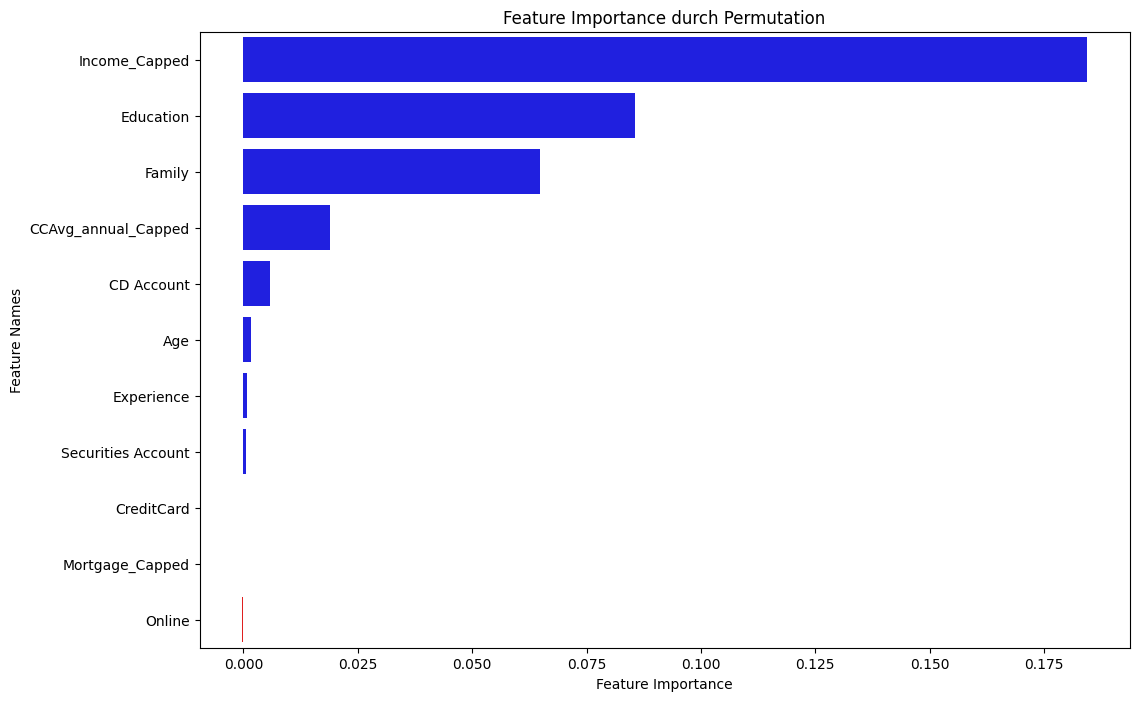

In [40]:
# Beste Modelle laden
best_rf_model = joblib.load('best_rf_model.joblib')

# Berechnung der Permutation Importance
perm_importance = permutation_importance(best_rf_model, X, y, n_repeats=10, random_state=42)

# Visualisierung der Feature Importance
feature_names = X.columns
importances = perm_importance.importances_mean
std = perm_importance.importances_std

# Sortieren der Feature Importance
indices = np.argsort(importances)[::-1]

# Farben basierend auf dem Wert der Importance
colors = ['red' if importance < 0 else 'blue' for importance in importances[indices]]

# Balkendiagramm
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=feature_names[indices], palette=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance durch Permutation')
plt.show()

### Analyse der Feature-Wichtigkeit durch Permutation

Die Feature Importance Analyse zeigt, welche Features den größten Einfluss auf die Modellleistung haben. Die Grafik visualisiert die Bedeutung der einzelnen Features basierend auf dem Permutationsverfahren.

* **Income_Capped:** Dieses Feature hat den höchsten Einfluss auf die Modellleistung, was darauf hindeutet, dass das Einkommen der wichtigste Faktor bei der Vorhersage der Kreditaufnahme ist.
* **Education:** Auch der Bildungsgrad spielt eine wesentliche Rolle bei der Klassifikation.
* **Family:** Die Größe der Familie ist ebenfalls ein wichtiger Faktor. Dies könnte darauf hinweisen, dass Familiengrößen mit der Wahrscheinlichkeit der Kreditaufnahme korrelieren.
* **CCAvg_annual_Capped:** Die jährlichen durchschnittlichen Kreditkartenausgaben sind ein weiterer wichtiger Faktor, der die Kreditaufnahme beeinflusst.
* **CD Account:** Das Vorhandensein eines CD-Kontos (Certificate of Deposit) zeigt ebenfalls eine gewisse Bedeutung bei der Vorhersage der Kreditaufnahme.
* **Age:** Das Alter der Personen hat einen geringeren, aber dennoch messbaren Einfluss auf die Modellleistung.
* **Experience:** Berufserfahrung spielt eine untergeordnete Rolle, beeinflusst aber dennoch leicht die Vorhersagen.
* **Securities Account:** Das Vorhandensein eines Wertpapierkontos hat einen minimalen Einfluss.
* **CreditCard:** Das Vorhandensein einer Kreditkarte hat keinen Einfluss.
* **Mortgage_Capped:** Auch Hypothekenzahlungen zeigen keine Bedeutung in diesem Modell.
* **Online:** Dieses Feature hat sogar einen negativen Einfluss, was darauf hinweist, dass seine Entfernung die Modellleistung verbessern könnte.

### Fazit
Die Analyse der Feature-Wichtigkeit liefert wertvolle Einblicke in die Faktoren, die die Kreditaufnahme beeinflussen. Die Ergebnisse zeigen, dass finanzielle Faktoren (wie Einkommen und Kreditkartenausgaben) sowie demografische Merkmale (wie Bildung und Familiengröße) die wichtigsten Prädiktoren sind. Diese Informationen können genutzt werden, um die Kreditvergabeprozesse zu optimieren.

<h5 style="color: orange; font-weight: bold;">Conclusions and Future Work</h5>

#### Zusammenfassung und Interpretation der erzielten Ergebnisse
In diesem Projekt wurden Modelle entwickelt und evaluiert, um vorherzusagen, ob eine Person einen persönlichen Kredit aufnehmen wird. Mehrere Algorithmen wurden verglichen, einschließlich eines Baseline-Dummy-Klassifikators, SVM und Random Forest. Das Random Forest-Modell erwies sich als das leistungsstärkste Modell mit einem F1-Score von 0,9133 und hervorragender Leistung in anderen Metriken wie Precision und Recall. Die Analyse der Feature-Wichtigkeit zeigte, dass Einkommen, Bildung und Familiengröße die bedeutendsten Prädiktoren waren. Das Modell zeigte hohe Genauigkeit und Robustheit bei der Identifizierung potenzieller Kreditnehmer, was es zu einem wertvollen Werkzeug für die Bank macht.

#### Kritische Reflexion und Bewertung der Anwendbarkeit der angewandten Methodik im Kontext der Aufgabe (Aufgabe 1)
Die angewandte Methodik, die Datenvorverarbeitung, Modelltraining mit verschachtelter Kreuzvalidierung und Leistungsevaluierung umfasste, war für diese Aufgabe effektiv. Die Verwendung der verschachtelten Kreuzvalidierung stellte sicher, dass das Modell nicht überangepasst wurde und die Hyperparameter optimal abgestimmt waren. Die Analyse der Feature-Wichtigkeit lieferte wertvolle Einblicke in die wichtigsten Merkmale, die die Kreditaufnahme beeinflussen, was gut mit dem Bedarf der Bank übereinstimmt, das Kundenverhalten zu verstehen.

#### Erklärung des generierten Wertes im Kontext der Aufgabe
Das erstellte Modell bietet einen guten Mehrwert, indem es der Bank ermöglicht, genau vorherzusagen, welche Kunden wahrscheinlich einen Kredit aufnehmen werden. Dies kann die Zielstrategien verbessern, Marketingbemühungen optimieren und letztlich die Kreditaufnahmequote erhöhen. Darüber hinaus kann das Verständnis der Schlüsselfaktoren, die die Kreditentscheidungen beeinflussen, der Bank helfen, ihre Kundenprofilierung und Risikobewertungsprozesse zu verfeinern, was zu einem persönlicheren und effizienteren Kundenservice führt.

#### Erklärung der Einschränkungen und Fallstricke und kritische Diskussion der angewandten Methodik (eigene Entscheidungen sowie die in diesen Aufgaben gegebenen Entscheidungen). Was könnte oder sollte sogar anders gemacht werden?
Obwohl die Methodik im Allgemeinen effektiv war, gibt es einige Einschränkungen und Verbesserungsmöglichkeiten:
- **Klassenungleichgewicht:** Das Datenset wies ein Ungleichgewicht zwischen den Klassen auf, was die Modellleistung beeinflussen könnte. Obwohl ein Downsampling verwendet wurde, könnten alternative Techniken wie SMOTE (Synthetic Minority Over-sampling Technique) untersucht werden. Durch das verwenden verschiedener Behandlungsmethoden bei Klassenungewicht kann untersucht werden welches am besten funktioniert und am wenigsten zu Over- bzw. Underfitting führt.
- **Feature Engineering:** Es könnten fortschrittlichere Feature-Engineering-Techniken angewendet werden, um versteckte Muster in den Daten aufzudecken. (z.B gelöschtes Feature Zip Codes). 
- **Algorithmuswahl:** Andere Algorithmen wie Boosting Modelle könnten getestet werden, um möglicherweise bessere Ergebnisse zu erzielen. Gerade Bossting Modelle von Bäumen wären interessant, weil die oft noch mal besser performen als RF. Vor allem bei Klassen mit ungleichgewicht. 

#### Vorschläge für zukünftige Arbeiten
- **Verwendung von SMOTE:** Implementierung von SMOTE (Synthetic Minority Over-sampling Technique), um das Klassenungleichgewicht effektiver zu adressieren. SMOTE generiert synthetische Beispiele für die Minderheitsklasse, um das Modelltraining zu verbessern und die Performance bei unausgeglichenen Datensätzen zu erhöhen.

- **Algorithmuswahl:** Andere Algorithmen wie Boosting-Modelle könnten getestet werden, um möglicherweise bessere Ergebnisse zu erzielen. Insbesondere Boosting-Modelle von Bäumen, wie Gradient Boosting, XGBoost, LightGBM und CatBoost, wären interessant, weil sie oft noch einmal besser performen als Random Forests. Diese Modelle sind besonders effektiv bei Klassen mit Ungleichgewicht, da sie iterativ lernen und somit besser in der Lage sind, schwer zu klassifizierende Beispiele zu identifizieren. Gradient Boosting Machines kombinieren mehrere schwache Modelle zu einem starken Modell und können so die Vorhersagegenauigkeit steigern. Neuronale Netze, insbesondere tiefe neuronale Netze, können durch ihre Fähigkeit, mehrere Schichten von Abstraktionen zu lernen, auch bei komplexen Datensätzen gut performen. Diese Modelle könnten in der Lage sein, die Performance auf diesem Datenset weiter zu verbessern.